Importing Modules and Zillow Data (csv)

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from numerize.numerize import numerize as nz # Easy number formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,StrMethodFormatter, FuncFormatter, AutoMinorLocator)

Defining Function to plot barcharts

In [243]:
import matplotlib.ticker as mtick
def nice_axes(ax, axisformat='abs'):
    ax.set_facecolor('.9')
    ax.tick_params(labelsize=7, length=0)
    ax.grid(True, axis='y', color='white')
    ax.set_axisbelow(True)
    if axisformat == 'pct':
        fmt = mtick.PercentFormatter()
    elif axisformat == 'abs':
        fmt = FuncFormatter(nz)
    # FuncFormatter(nz)
    ax.yaxis.set_major_formatter(fmt)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
def barhplot_by_location(df, title, axisformat, **kwargs):
    df.sort_values(ascending=True, inplace=True)
    fig, ax = plt.subplots(figsize=(7, 3.5), dpi=144)
    y = df.index.get_level_values(-1)
    width = df.values
    if axisformat=='pct': width = width * 100
    colors = plt.cm.Accent(range(len(df)))
    ax.barh(y=y, width=width, color=colors, **kwargs)
    ax.set_title(title, fontsize=10, fontweight='bold', pad=10)
    # set minimum axis limits
    ax.set_xbound(lower=width.min()*0.75)
    ax.xaxis.set_label_text('ZHVI - $(USD)', fontsize=7, fontweight='light')
    nice_axes(ax, axisformat)
    return ax

def barplot_by_location(df, title, axisformat, **kwargs):
    df.sort_values(ascending=True, inplace=True)
    fig, ax = plt.subplots(figsize=(7, 3.5), dpi=144)
    y = df.index.get_level_values(-1)
    width = df.values
    if axisformat=='pct': width = width * 100
    # Use a color map to get different colors for each bar
    # colors = plt.cm.get_cmap('CMRmap', len(df))
    colors = plt.cm.CMRmap(np.arange(len(df)*200))[::20]
    ax.bar(x=y, height=width, color=colors, **kwargs)
    ax.set_title(title, fontsize=10, fontweight='bold', pad=10)
    # set minimum axis limits
    ax.set_ybound(lower=width.min()*0.75)
    # ax.xaxis.set_label_text('Percent Change - %', fontsize=7, fontweight='light')
    # Rotate x-axis labels
    nice_axes(ax, axisformat)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    return ax

Loading Datasets from CSV

In [3]:
# Load All Homes CSV file
Neighborhood_Zori_AllHomes = pd.read_csv('Data/City_zori_sm_month.csv',index_col=[5,7,6,2])
Neighborhood_Zhvi_AllHomes = pd.read_csv('Data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])
# Neighborhood_Zhvi_2bedroom = pd.read_csv('Data/Neighborhood_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])
# Neighborhood_Zhvi_3bedroom = pd.read_csv('Data/Neighborhood_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])

In [4]:
Neighborhood_Zhvi_AllHomes.index.to_frame().describe()

,State,Metro,CountyName,City,RegionName
count,21492,21480,21492,21491,21492
unique,51,302,419,884,16644
top,TX,"Dallas-Fort Worth-Arlington, TX",Maricopa County,Nashville,Downtown
freq,3157,1575,854,421,154


In [5]:

Neighborhood_Zori_AllHomes.index.to_frame().describe()

,State,CountyName,Metro,RegionName
count,2886,2886,2883,2886
unique,51,644,482,2521
top,CA,Los Angeles County,"New York-Newark-Jersey City, NY-NJ-PA",Springfield
freq,348,75,160,9


## Transforming Data to Time series

In [38]:
zori_timeseries = Neighborhood_Zori_AllHomes.T
dates = pd.to_datetime(zori_timeseries.index, errors='coerce').dropna()
zori_timeseries = zori_timeseries.loc[dates.strftime("%Y-%m-%d")]
zori_timeseries.set_index(dates, inplace=True)
zori_timeseries.head()

State                                         NY  \
CountyName                         Queens County   
Metro      New York-Newark-Jersey City, NY-NJ-PA   
RegionName                              New York   
2015-03-31                           2579.166763   
2015-04-30                           2602.537436   
2015-05-31                           2625.174776   
2015-06-30                           2647.909901   
2015-07-31                           2662.999604   

State                                      CA  \
CountyName                 Los Angeles County   
Metro      Los Angeles-Long Beach-Anaheim, CA   
RegionName                        Los Angeles   
2015-03-31                        1935.753229   
2015-04-30                        1946.302862   
2015-05-31                        1964.416286   
2015-06-30                        1977.700815   
2015-07-31                        1997.134885   

State                                        TX  \
CountyName                        Harris County   
Metro      Houston-The Woodlands-Sugar Land, TX   
RegionName                              Houston   
2015-03-31                          1305.667387   
2015-04-30                          1313.799431   
2015-05-31                          1325.044451   
2015-06-30                          1335.113433   
2015-07-31                          1339.056673   

State                                      IL                            TX  \
CountyName                        Cook County                  Bexar County   
Metro      Chicago-Naperville-Elgin, IL-IN-WI San Antonio-New Braunfels, TX   
RegionName                            Chicago                   San Antonio   
2015-03-31                        1539.735397                   1004.298805   
2015-04-30                        1555.588309                   1012.551005   
2015-05-31                        1569.978624                   1021.953641   
2015-06-30                        1601.899058                   1029.258685   
2015-07-31                        1609.915659                    1032.86398   

State                             AZ  \
CountyName           Maricopa County   
Metro      Phoenix-Mesa-Chandler, AZ   
RegionName                   Phoenix   
2015-03-31                920.407962   
2015-04-30                935.639828   
2015-05-31                940.006721   
2015-06-30                947.885397   
2015-07-31                947.714915   

State                                               PA  \
CountyName                         Philadelphia County   
Metro      Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
RegionName                                Philadelphia   
2015-03-31                                 1258.420104   
2015-04-30                                 1265.696512   
2015-05-31                                  1277.17632   
2015-06-30                                 1284.654747   
2015-07-31                                 1288.881977   

State                                    NV  \
CountyName                     Clark County   
Metro      Las Vegas-Henderson-Paradise, NV   
RegionName                        Las Vegas   
2015-03-31                      1036.210187   
2015-04-30                      1045.567078   
2015-05-31                      1050.794941   
2015-06-30                      1059.806981   
2015-07-31                      1065.178529   

State                                      CA                              TX  \
CountyName                   San Diego County                   Dallas County   
Metro      San Diego-Chula Vista-Carlsbad, CA Dallas-Fort Worth-Arlington, TX   
RegionName                          San Diego                          Dallas   
2015-03-31                        1831.391754                     1161.735388   
2015-04-30                        1845.056397                     1169.565648   
2015-05-31                        1850.189366                      1185.16512   
2015-06-30                        1856.442

In [7]:
zhvi_timeseries = Neighborhood_Zhvi_AllHomes.T
dates = pd.to_datetime(zhvi_timeseries.index, errors='coerce').dropna()
zhvi_timeseries = zhvi_timeseries.loc[dates.strftime("%Y-%m-%d")]
zhvi_timeseries.index = pd.to_datetime(zhvi_timeseries.index, errors='coerce').dropna()
zhvi_timeseries.head()

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2000-01-31,81974.0,153332.0,148473.0,555357.0,154777.0,392005.0,156540.0,137030.0,134200.0,165396.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,82304.0,153428.0,148433.0,559325.0,154662.0,396040.0,156473.0,137233.0,134188.0,166891.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,82711.0,153458.0,148752.0,563258.0,154915.0,398802.0,156748.0,137629.0,134484.0,167749.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,83594.0,153713.0,149375.0,571724.0,155573.0,405873.0,157374.0,138344.0,135090.0,170097.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,84481.0,153888.0,150104.0,582366.0,156590.0,413360.0,158077.0,139230.0,135774.0,171704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Indexing (Accessing Data)

In [8]:
# Extract the last row of each timeseries as the current rent
last_rents = zori_timeseries.iloc[-1]
last_rents = last_rents.to_frame()
last_rents

2023-01-31
State CountyName            Metro                                        RegionName                          
NY    Queens County         New York-Newark-Jersey City, NY-NJ-PA        New York                 3272.610475
CA    Los Angeles County    Los Angeles-Long Beach-Anaheim, CA           Los Angeles              2857.871709
TX    Harris County         Houston-The Woodlands-Sugar Land, TX         Houston                  1620.801567
IL    Cook County           Chicago-Naperville-Elgin, IL-IN-WI           Chicago                  1975.001786
TX    Bexar County          San Antonio-New Braunfels, TX                San Antonio              1441.081075
...                                                                                                       ...
NY    Suffolk County        New York-Newark-Jersey City, NY-NJ-PA        Shelter Island Heights       16800.0
                                                                         Quogue                  51666.666667
                                                                         Amagansett              54321.972222
KS    Riley County          Manhattan, KS                                Ogden                         1125.0
MD    Prince Georges County Washington-Arlington-Alexandria, DC-VA-MD-WV Upper Marlboro           2108.126984

[2886 rows x 1 columns]

In [11]:
# Find the most expensive cities to rent in CA
last_rents.loc['CA'].sort_values(by = '2023-01-31', ascending=False).head(10).applymap(nz)

,,,2023-01-31
CountyName,Metro,RegionName,
Los Angeles County,"Los Angeles-Long Beach-Anaheim, CA",Malibu,11.46K
San Diego County,"San Diego-Chula Vista-Carlsbad, CA",Rancho Santa Fe,10.9K
Los Angeles County,"Los Angeles-Long Beach-Anaheim, CA",Topanga,6.5K
Alameda County,"San Francisco-Oakland-Berkeley, CA",Piedmont,5.9K
San Diego County,"San Diego-Chula Vista-Carlsbad, CA",Del Mar,5.72K
Santa Clara County,"San Jose-Sunnyvale-Santa Clara, CA",Saratoga,5.44K
Santa Barbara County,"Santa Maria-Santa Barbara, CA",Solvang,5.4K
Orange County,"Los Angeles-Long Beach-Anaheim, CA",Laguna Beach,5.27K
Contra Costa County,"San Francisco-Oakland-Berkeley, CA",Orinda,5.18K


In [13]:
zori_timeseries.loc[:,last_rents.loc[['CA']].sort_values(by = '2023-01-31', ascending=False).head(10).index.values]

State                                      CA  \
CountyName                 Los Angeles County   
Metro      Los Angeles-Long Beach-Anaheim, CA   
RegionName                             Malibu   
2015-03-31                        4914.047281   
2015-04-30                        5021.751046   
2015-05-31                        5218.220536   
2015-06-30                        5282.838866   
2015-07-31                         5379.31789   
...                                       ...   
2022-09-30                       11250.729049   
2022-10-31                       11053.954105   
2022-11-30                       10669.376321   
2022-12-31                       11210.208639   
2023-01-31                       11462.196429   

State                                          \
CountyName                   San Diego County   
Metro      San Diego-Chula Vista-Carlsbad, CA   
RegionName                    Rancho Santa Fe   
2015-03-31                                NaN   
2015-04-30                                NaN   
2015-05-31                                NaN   
2015-06-30                                NaN   
2015-07-31                                NaN   
...                                       ...   
2022-09-30                                NaN   
2022-10-31                                NaN   
2022-11-30                       11686.474586   
2022-12-31                       12557.385189   
2023-01-31                            10905.0   

State                                          \
CountyName                 Los Angeles County   
Metro      Los Angeles-Long Beach-Anaheim, CA   
RegionName                            Topanga   
2015-03-31                                NaN   
2015-04-30                                NaN   
2015-05-31                                NaN   
2015-06-30                                NaN   
2015-07-31                                NaN   
...                                       ...   
2022-09-30                                NaN   
2022-10-31                                NaN   
2022-11-30                                NaN   
2022-12-31                                NaN   
2023-01-31                             6500.0   

State                                          \
CountyName                     Alameda County   
Metro      San Francisco-Oakland-Berkeley, CA   
RegionName                           Piedmont   
2015-03-31                                NaN   
2015-04-30                                NaN   
2015-05-31                                NaN   
2015-06-30                                NaN   
2015-07-31                                NaN   
...                                       ...   
2022-09-30                                NaN   
2022-10-31                                NaN   
2022-11-30                                NaN   
2022-12-31                        5813.400166   
2023-01-31                             5900.0   

State                                          \
CountyName                   San Diego County   
Metro      San Diego-Chula Vista-Carlsbad, CA   
RegionName                            Del Mar   
2015-03-31                                NaN   
2015-04-30                                NaN   
2015-05-31                                NaN   
2015-06-30                                NaN   
2015-07-31                                NaN   
...                                       ...   
2022-09-30                                NaN   
2022-10-31                                NaN   
2022-11-30                                NaN   
2022-12-31                                NaN   
2023-01-31                             5715.0   

State                                                                        \
CountyName                 Santa Clara County          Santa Barbara County   
Metro      San Jose-Sunnyvale-Santa Clara, CA Santa Maria-Santa Barbara, CA   
RegionName                           Saratoga                       Solvang   
2015

In [17]:
# Find the columns where last value is NaN
zori_timeseries.loc[:,zori_timeseries.loc[:,['CA']].isna().sum().sort_values(ascending=False).head(10).index]

State                                      CA                             \
CountyName                Contra Costa County          Santa Cruz County   
Metro      San Francisco-Oakland-Berkeley, CA Santa Cruz-Watsonville, CA   
RegionName                         Kensington                Watsonville   
2015-03-31                                NaN                        NaN   
2015-04-30                                NaN                        NaN   
2015-05-31                                NaN                        NaN   
2015-06-30                                NaN                        NaN   
2015-07-31                                NaN                        NaN   
...                                       ...                        ...   
2022-08-31                                NaN                        NaN   
2022-09-30                                NaN                        NaN   
2022-10-31                                NaN                        NaN   
2022-11-30                                NaN                        NaN   
2022-12-31                             4525.0                     3137.5   

State                                                                  \
CountyName                 Los Angeles County                           
Metro      Los Angeles-Long Beach-Anaheim, CA                           
RegionName                           Altadena View Park-Windsor Hills   
2015-03-31                                NaN                     NaN   
2015-04-30                                NaN                     NaN   
2015-05-31                                NaN                     NaN   
2015-06-30                                NaN                     NaN   
2015-07-31                                NaN                     NaN   
...                                       ...                     ...   
2022-08-31                                NaN                     NaN   
2022-09-30                                NaN                     NaN   
2022-10-31                                NaN                     NaN   
2022-11-30                                NaN                     NaN   
2022-12-31                        2730.833333                  1897.0   

State                                                          \
CountyName                     Alameda County Imperial County   
Metro      San Francisco-Oakland-Berkeley, CA   El Centro, CA   
RegionName                           Piedmont       El Centro   
2015-03-31                                NaN             NaN   
2015-04-30                                NaN             NaN   
2015-05-31                                NaN             NaN   
2015-06-30                                NaN             NaN   
2015-07-31                                NaN             NaN   
...                                       ...             ...   
2022-08-31                                NaN             NaN   
2022-09-30                                NaN             NaN   
2022-10-31                                NaN             NaN   
2022-11-30                                NaN             NaN   
2022-12-31                             5400.0          1650.0   

State                                          \
CountyName                Contra Costa County   
Metro      San Francisco-Oakland-Berkeley, CA   
RegionName                            Clayton   
2015-03-31                                NaN   
2015-04-30                                NaN   
2015-05-31                                NaN   
2015-06-30                                NaN   
2015-07-31                                NaN   
...                                       ...   
2022-08-31                                NaN   
2022-09-30                                NaN   
2022-10-31                                NaN   
2022-11-30                                NaN   
2022-12-31                             2775.0   

State                                              

Find a segment of data with consistent data for the last 36 months

In [15]:
# Take cities with at least 36 months of data
last_rents_consistent48 = zori_timeseries.iloc[-1][zori_timeseries.iloc[-49:].count(axis=0)>40] 

Create a new dataframe with missing values interpolated. Consistent with the last 5 years.

In [128]:
# Convert dataframe to numeric
zori_timeseries = zori_timeseries.apply(pd.to_numeric, errors='coerce')

In [129]:
# Interpolate missing values in timeseries containing nan values
zori_timeseries_interpolated = (zori_timeseries.loc[:,last_rents_consistent48.index].iloc[-49:]).interpolate(method='linear',axis=0).bfill()

10 most expensive cities to rent in the State of California (ie. 'CA')

In [139]:
top10rents = last_rents_consistent48.loc[['CA']].sort_values(ascending=False).head(10)

In [140]:
# Add prices from one year and three years ago with percent change from current
top10rents = top10rents.to_frame(name = '2023-01-31')
top10rents['1yr'] = zori_timeseries_interpolated.iloc[-12].loc[top10rents.index]
top10rents['3yr'] = zori_timeseries_interpolated.iloc[-36].loc[top10rents.index]
top10rents['1yr_pct'] = (top10rents['2023-01-31'] - top10rents['1yr']) / top10rents['1yr']
top10rents['3yr_pct'] = (top10rents['2023-01-31'] - top10rents['3yr']) / top10rents['3yr']
top10rents.applymap(nz)

2023-01-31  \
State CountyName          Metro                              RegionName                       
CA    Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Malibu                  11.46K   
      Orange County       Los Angeles-Long Beach-Anaheim, CA Laguna Beach             5.27K   
      Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Manhattan Beach          5.15K   
                                                             Rancho Palos Verdes      4.67K   
      Marin County        San Francisco-Oakland-Berkeley, CA Mill Valley              4.59K   
      San Diego County    San Diego-Chula Vista-Carlsbad, CA Coronado                 4.46K   
                                                             Solana Beach             4.41K   
      Contra Costa County San Francisco-Oakland-Berkeley, CA Danville                 4.24K   
      Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Beverly Hills            4.23K   
      San Mateo County    San Francisco-Oakland-Berkeley, CA Menlo Park               4.11K   

                                                                                     1yr  \
State CountyName          Metro                              RegionName                    
CA    Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Malibu               10.81K   
      Orange County       Los Angeles-Long Beach-Anaheim, CA Laguna Beach          5.11K   
      Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Manhattan Beach       4.66K   
                                                             Rancho Palos Verdes   4.42K   
      Marin County        San Francisco-Oakland-Berkeley, CA Mill Valley            4.7K   
      San Diego County    San Diego-Chula Vista-Carlsbad, CA Coronado              3.94K   
                                                             Solana Beach          4.07K   
      Contra Costa County San Francisco-Oakland-Berkeley, CA Danville              3.95K   
      Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Beverly Hills         4.06K   
      San Mateo County    San Francisco-Oakland-Berkeley, CA Menlo Park            3.91K   

                                                                                    3yr  \
State CountyName          Metro                              RegionName                   
CA    Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Malibu               7.57K   
      Orange County       Los Angeles-Long Beach-Anaheim, CA Laguna Beach         3.81K   
      Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Manhattan Beach      4.05K   
                                                             Rancho Palos Verdes  3.51K   
      Marin County        San Francisco-Oakland-Berkeley, CA Mill Valley          3.97K   
      San Diego County    San Diego-Chula Vista-Carlsbad, CA Coronado             3.01K   
                                                             Solana Beach            3K   
      Contra Costa County San Francisco-Oakland-Berkeley, CA Danville              3.5K   
      Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Beverly Hills        3.72K   
      San Mateo County    San Francisco-Oakland-Berkeley, CA Menlo Park           3.96K   

                                                                                 1yr_pct  \
State CountyName          Metro                              RegionName                    
CA    Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Malibu                 0.06   
      Orange County       Los Angeles-Long Beach-Anaheim, CA Laguna Beach           0.03   
      Los Angeles County  Los Angeles-Long Beach-Anaheim, CA Manhattan Beach         0.1   
                                                             Rancho Palos Verdes    0.06   
      Marin County        San Francisco-Oakland-Berkeley, CA Mill Valley           -0.02   
      San Diego County    San Diego-Chula Vista-Carlsbad, CA Coronado               0.13   
      

/var/folders/dz/2jdnkp3541v0nxf__ztf1nw80000gn/T/ipykernel_49234/3475563731.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


<AxesSubplot: title={'center': 'Highest Average Rents by City in California @ January 2023'}>

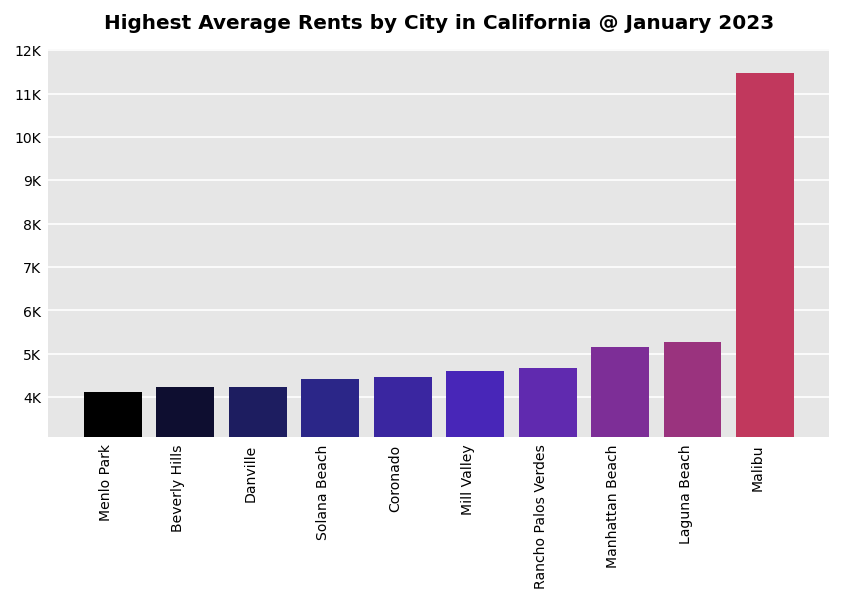

In [236]:
barplot_by_location(top10rents['2023-01-31'].copy(), axisformat='abs',title='Highest Average Rents by City in California @ January 2023')

10 least expensive cities to rent

In [152]:
bottom10_rents = last_rents_consistent48.loc[['CA']].dropna().sort_values(ascending=False).tail(10)
bottom10_rents = bottom10_rents.to_frame(name = '2023-01-31')
bottom10_rents['1yr'] = zori_timeseries_interpolated.iloc[-12].loc[bottom10_rents.index]
bottom10_rents['3yr'] = zori_timeseries_interpolated.iloc[-36].loc[bottom10_rents.index]
bottom10_rents['1yr_pct'] = (bottom10_rents['2023-01-31'] - bottom10_rents['1yr']) / bottom10_rents['1yr']
bottom10_rents['3yr_pct'] = (bottom10_rents['2023-01-31'] - bottom10_rents['3yr']) / bottom10_rents['3yr']
bottom10_rents.applymap(nz)

2023-01-31  \
State CountyName            Metro                                RegionName                  
CA    Sacramento County     Sacramento-Roseville-Folsom, CA      Citrus Heights      1.87K   
      Kern County           Bakersfield, CA                      Bakersfield         1.84K   
      Merced County         Merced, CA                           Merced              1.83K   
      Sacramento County     Sacramento-Roseville-Folsom, CA      Arden-Arcade        1.78K   
      Tulare County         Visalia, CA                          Visalia             1.75K   
      Fresno County         Fresno, CA                           Fresno              1.75K   
      San Bernardino County Riverside-San Bernardino-Ontario, CA Apple Valley        1.69K   
      Butte County          Chico, CA                            Chico               1.62K   
      Shasta County         Redding, CA                          Redding             1.45K   
      Kern County           Bakersfield, CA                      Ridgecrest          1.34K   

                                                                                   1yr  \
State CountyName            Metro                                RegionName              
CA    Sacramento County     Sacramento-Roseville-Folsom, CA      Citrus Heights  1.79K   
      Kern County           Bakersfield, CA                      Bakersfield     1.78K   
      Merced County         Merced, CA                           Merced          1.83K   
      Sacramento County     Sacramento-Roseville-Folsom, CA      Arden-Arcade    1.72K   
      Tulare County         Visalia, CA                          Visalia         1.65K   
      Fresno County         Fresno, CA                           Fresno          1.64K   
      San Bernardino County Riverside-San Bernardino-Ontario, CA Apple Valley    1.68K   
      Butte County          Chico, CA                            Chico           1.58K   
      Shasta County         Redding, CA                          Redding         1.33K   
      Kern County           Bakersfield, CA                      Ridgecrest      1.28K   

                                                                                    3yr  \
State CountyName            Metro                                RegionName               
CA    Sacramento County     Sacramento-Roseville-Folsom, CA      Citrus Heights   1.42K   
      Kern County           Bakersfield, CA                      Bakersfield      1.34K   
      Merced County         Merced, CA                           Merced           1.38K   
      Sacramento County     Sacramento-Roseville-Folsom, CA      Arden-Arcade     1.41K   
      Tulare County         Visalia, CA                          Visalia          1.25K   
      Fresno County         Fresno, CA                           Fresno           1.31K   
      San Bernardino County Riverside-San Bernardino-Ontario, CA Apple Valley    920.32   
      Butte County          Chico, CA                            Chico            1.39K   
      Shasta County         Redding, CA                          Redding          1.11K   
      Kern County           Bakersfield, CA                      Ridgecrest       1.09K   

                                                                                1yr_pct  \
State CountyName            Metro                                RegionName               
CA    Sacramento County     Sacramento-Roseville-Folsom, CA      Citrus Heights    0.04   
      Kern County           Bakersfield, CA                      Bakersfield       0.03   
      Merced County         Merced, CA                           Merced              -0   
      Sacramento County     Sacramento-Roseville-Folsom, CA      Arden-Arcade      0.03   
      Tulare County         Visalia, CA                          Visalia           0.06   
      Fresno County         Fresno, CA                           Fresno            0.06   
      San Bernardino County Riverside-San Bernard

/var/folders/dz/2jdnkp3541v0nxf__ztf1nw80000gn/T/ipykernel_49234/3475563731.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


<AxesSubplot: title={'center': 'Lowest Average Rent by City in California @ January 2023'}>

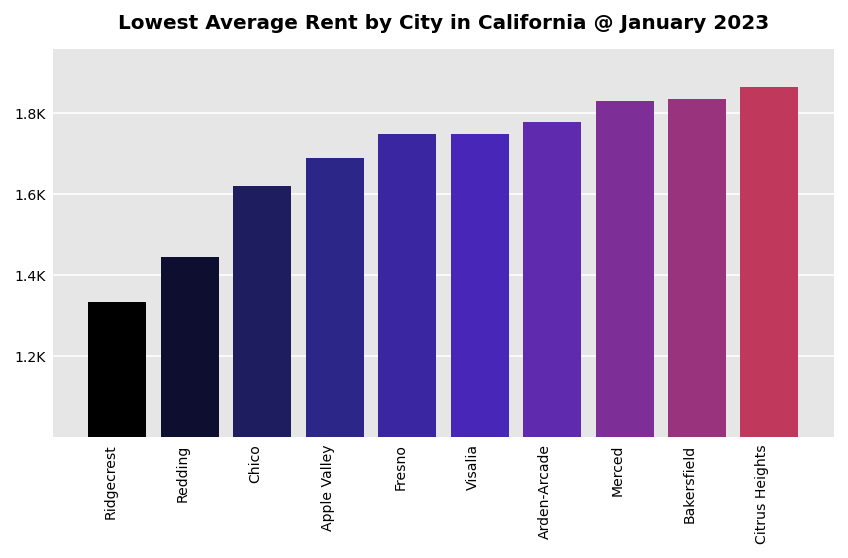

In [237]:
barplot_by_location(bottom10_rents['2023-01-31'].copy(), axisformat='abs',title='Lowest Average Rent by City in California @ January 2023')

Top most expensive cities to rent in 2023, one year ago

In [20]:
zori_timeseries.iloc[-12].loc[last_rents_consistent48.loc[['CA']].sort_values(ascending=False).head(10).index].sort_values(ascending=False).head(10).apply(nz)

State  CountyName           Metro                               RegionName         
CA     Los Angeles County   Los Angeles-Long Beach-Anaheim, CA  Malibu                 10.81K
       Orange County        Los Angeles-Long Beach-Anaheim, CA  Laguna Beach            5.11K
       Marin County         San Francisco-Oakland-Berkeley, CA  Mill Valley              4.7K
       Los Angeles County   Los Angeles-Long Beach-Anaheim, CA  Manhattan Beach         4.66K
                                                                Rancho Palos Verdes     4.42K
       San Diego County     San Diego-Chula Vista-Carlsbad, CA  Solana Beach            4.07K
       Los Angeles County   Los Angeles-Long Beach-Anaheim, CA  Beverly Hills           4.06K
       Contra Costa County  San Francisco-Oakland-Berkeley, CA  Danville                3.95K
       San Diego County     San Diego-Chula Vista-Carlsbad, CA  Coronado                3.94K
       San Mateo County     San Francisco-Oakland-Berkeley, CA  Menlo 

These are the Counties with the largest spread in prices accross Cities

In [169]:
# Find the counties in CA that have data for at least two cities
counties = (zori_timeseries_interpolated['CA'].iloc[-1].groupby(level=0).count()>1).to_frame()
counties = counties[counties==True]


In [176]:
# Use counties index to filter out cities that are not in the counties
last_rents.loc['CA'].loc[counties.index]

2023-01-31
CountyName     Metro                              RegionName                   
Alameda County San Francisco-Oakland-Berkeley, CA Oakland            2693.03171
                                                  Fremont           2937.167584
                                                  Hayward           2476.811525
                                                  Berkeley          2825.364683
                                                  San Leandro       2540.650816
...                                                                         ...
Ventura County Oxnard-Thousand Oaks-Ventura, CA   Westlake Village  3788.541667
                                                  Oak Park          2930.595238
Yolo County    Sacramento-Roseville-Folsom, CA    Davis             2603.477778
                                                  Woodland          2155.485714
                                                  West Sacramento   2245.330484

[340 rows x 1 columns]

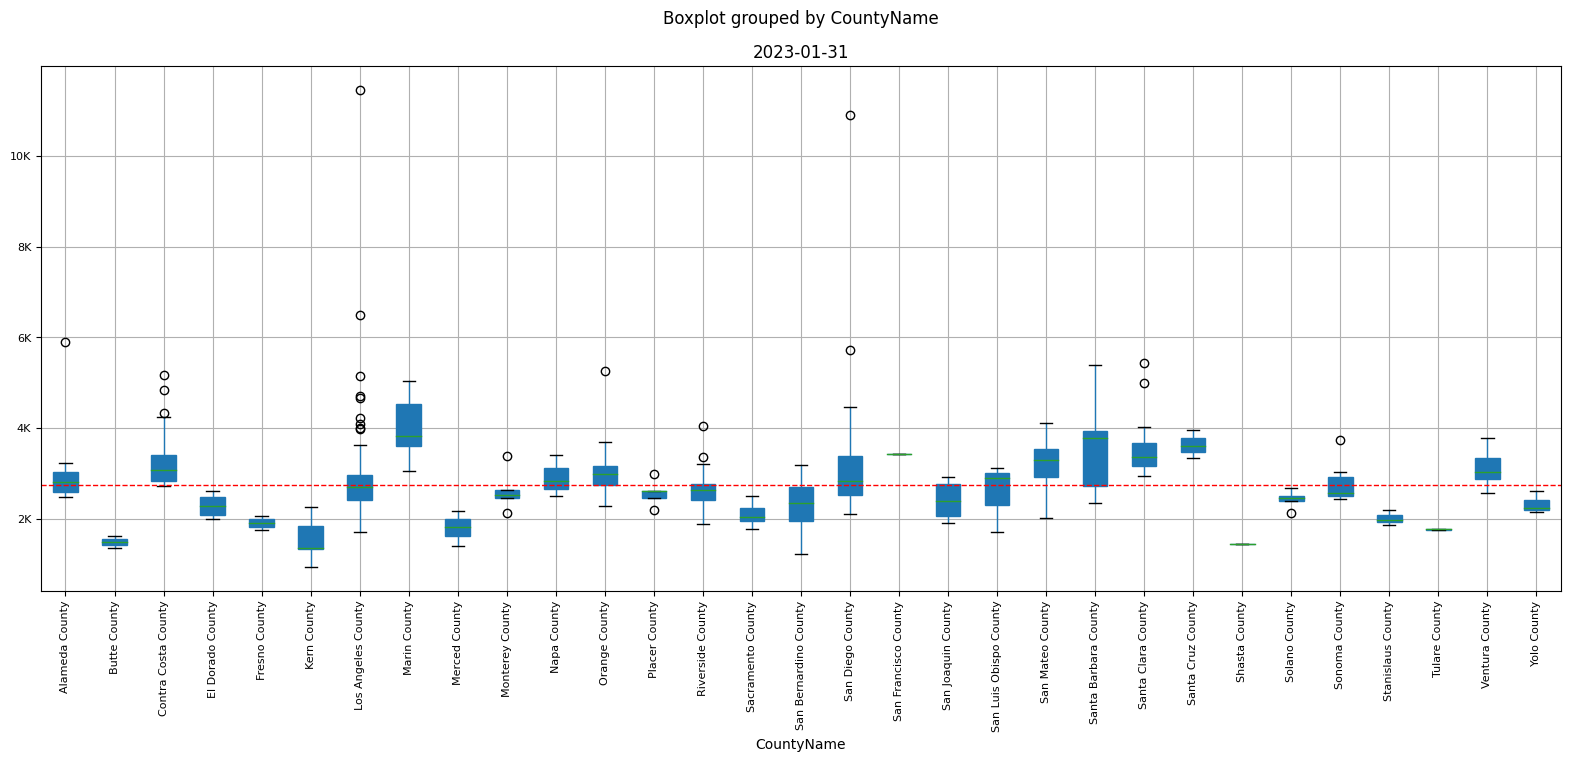

In [177]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(19,7))
# Create boxplot of rents by county
boxplot = last_rents.loc['CA'].loc[counties.index].boxplot(ax=ax,column='2023-01-31', by='CountyName', figsize=(20,10), rot=90, fontsize=8, grid=True, showfliers=True, patch_artist=True, return_type='axes')
# Apply the nz function to y axis to format the numbers
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: nz(y)))
# Add a line the the median rent
plt.axhline(last_rents.loc['CA'].median().mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()

In [22]:
# Convert dataframe to numeric
zori_timeseries = zori_timeseries.apply(pd.to_numeric, errors='coerce')

In [24]:
# Interpolate missing values in timeseries containing nan values
# zori_timeseries.loc[:,(zori_timeseries.iloc[-36:].count(axis=0)>30)].iloc[-37:]
zori_timeseries_interpolated = (zori_timeseries.loc[:,last_rents_consistent48.index].iloc[-49:]).interpolate(method='linear',axis=0).bfill()
# Drop columns where all values are nan
# zori_timeseries.loc[:,last_rents_consistent36.index].dropna(axis=1, how='all').interpolate(method='linear', axis=0).bfill()
zori_timeseries_interpolated

State                                         NY  \
CountyName                         Queens County   
Metro      New York-Newark-Jersey City, NY-NJ-PA   
RegionName                              New York   
2019-01-31                           2768.910879   
2019-02-28                           2775.114970   
2019-03-31                           2791.376127   
2019-04-30                           2813.264679   
2019-05-31                           2838.885469   
2019-06-30                           2862.560148   
2019-07-31                           2883.959169   
2019-08-31                           2896.198310   
2019-09-30                           2900.244744   
2019-10-31                           2893.235273   
2019-11-30                           2873.767798   
2019-12-31                           2859.579640   
2020-01-31                           2859.817370   
2020-02-29                           2876.077596   
2020-03-31                           2892.489837   
2020-04-30                           2886.384504   
2020-05-31                           2862.569427   
2020-06-30                           2823.699299   
2020-07-31                           2781.427156   
2020-08-31                           2714.218200   
2020-09-30                           2647.009244   
2020-10-31                           2579.800288   
2020-11-30                           2533.560768   
2020-12-31                           2507.727159   
2021-01-31                           2493.801208   
2021-02-28                           2499.662821   
2021-03-31                           2522.733625   
2021-04-30                           2565.272200   
2021-05-31                           2621.266914   
2021-06-30                           2691.381049   
2021-07-31                           2773.270999   
2021-08-31                           2850.746291   
2021-09-30                           2914.933470   
2021-10-31                           2950.968161   
2021-11-30                           2976.270257   
2021-12-31                           2993.748884   
2022-01-31                           3021.102481   
2022-02-28                           3060.047802   
2022-03-31                           3106.665488   
2022-04-30                           3162.154169   
2022-05-31                           3229.597005   
2022-06-30                           3300.699599   
2022-07-31                           3356.441190   
2022-08-31                           3384.050373   
2022-09-30                           3381.197079   
2022-10-31                           3356.934617   
2022-11-30                           3313.661221   
2022-12-31                           3281.408974   
2023-01-31                           3272.610475   

State                                      CA  \
CountyName                 Los Angeles County   
Metro      Los Angeles-Long Beach-Anaheim, CA   
RegionName                        Los Angeles   
2019-01-31                        2411.217938   
2019-02-28                        2417.452726   
2019-03-31                        2425.933418   
2019-04-30                        2432.842276   
2019-05-31                        2444.567322   
2019-06-30                        2456.857076   
2019-07-31                        2468.793113   
2019-08-31                        2479.066211   
2019-09-30                        2483.594631   
2019-10-31                        2483.865757   
2019-11-30                        2479.937509   
2019-12-31                        2481.686958   
2020-01-31                        2485.248611   
2020-02-29                        2493.601980   
2020-03-31                        2492.874253   
2020-04-30                        2478.217080   
2020-05-31                        2453.904927   
2020-06-30                        2434.457707   
2020-07-31                        2427.339134   
2020-08-31                        2418.303855   
2020-09-30                        2408.832830   
2020-10-31        

In [25]:
zori_timeseries_interpolated.loc[:,['CA']].dropna().sort_values(by = zori_timeseries_interpolated.index[-1], ascending=False, axis=1).tail(10).applymap(nz)

State                                      CA  \
CountyName                 Los Angeles County   
Metro      Los Angeles-Long Beach-Anaheim, CA   
RegionName                             Malibu   
2022-04-30                             11.93K   
2022-05-31                             11.96K   
2022-06-30                             11.49K   
2022-07-31                             11.51K   
2022-08-31                              11.5K   
2022-09-30                             11.25K   
2022-10-31                             11.05K   
2022-11-30                             10.67K   
2022-12-31                             11.21K   
2023-01-31                             11.46K   

State                                          \
CountyName                      Orange County   
Metro      Los Angeles-Long Beach-Anaheim, CA   
RegionName                       Laguna Beach   
2022-04-30                               5.4K   
2022-05-31                              5.41K   
2022-06-30                              5.45K   
2022-07-31                               5.4K   
2022-08-31                              5.23K   
2022-09-30                              5.11K   
2022-10-31                               5.2K   
2022-11-30                              5.39K   
2022-12-31                              5.38K   
2023-01-31                              5.27K   

State                                                              \
CountyName                 Los Angeles County                       
Metro      Los Angeles-Long Beach-Anaheim, CA                       
RegionName                    Manhattan Beach Rancho Palos Verdes   
2022-04-30                              4.77K               4.46K   
2022-05-31                              4.82K               4.48K   
2022-06-30                              4.95K               4.64K   
2022-07-31                              5.01K               4.54K   
2022-08-31                              5.02K                4.5K   
2022-09-30                              5.09K               4.48K   
2022-10-31                               5.1K               4.46K   
2022-11-30                              5.12K                4.6K   
2022-12-31                              5.17K               4.58K   
2023-01-31                              5.15K               4.67K   

State                                          \
CountyName                       Marin County   
Metro      San Francisco-Oakland-Berkeley, CA   
RegionName                        Mill Valley   
2022-04-30                              4.78K   
2022-05-31                              4.66K   
2022-06-30                              4.75K   
2022-07-31                              4.66K   
2022-08-31                              4.72K   
2022-09-30                              4.73K   
2022-10-31                              4.66K   
2022-11-30                              4.55K   
2022-12-31                              4.45K   
2023-01-31                              4.59K   

State                                                       \
CountyName                   San Diego County                
Metro      San Diego-Chula Vista-Carlsbad, CA                
RegionName                           Coronado Solana Beach   
2022-04-30                               4.1K        4.18K   
2022-05-31                              4.25K        4.13K   
2022-06-30                              4.44K        4.25K   
2022-07-31                              4.66K        4.31K   
2022-08-31                              4.57K        4.44K   
2022-09-30                              4.51K        4.54K   
2022-10-31                              4.43K        4.69K   
2022-11-30                              4.49K         4.7K   
2022-12-31                              4.35K        4.53K   
2023-01-31                              4.46K        4.41K   

State                                          \
CountyName                Contra Costa County   
Metro

<AxesSubplot: >

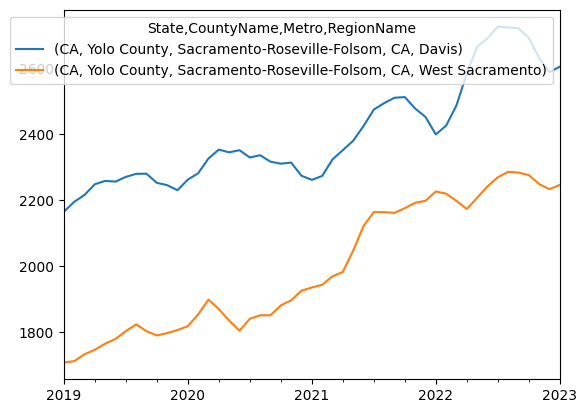

In [26]:
zori_timeseries_interpolated.loc[:,(['CA'],'Yolo County')].plot()

In [254]:
# Drop infinity values from series
top10_rentGrowth = zori_timeseries_interpolated.iloc[-37:].loc[:,['CA']].pct_change(36).iloc[-1].sort_values(ascending=False).head(10)

In [255]:
top10_rentGrowth = top10_rentGrowth.to_frame(name = '3yr_pct_1')*100
top10_rentGrowth['2023-01-31'] = zori_timeseries_interpolated.iloc[-1].loc[top10_rentGrowth.index]
top10_rentGrowth['1yr'] = zori_timeseries_interpolated.iloc[-13].loc[top10_rentGrowth.index]
top10_rentGrowth['3yr'] = zori_timeseries_interpolated.iloc[-37].loc[top10_rentGrowth.index]
top10_rentGrowth['1yr_pct'] = (top10_rentGrowth['2023-01-31'] - top10_rentGrowth['1yr']) / top10_rentGrowth['1yr']
top10_rentGrowth['3yr_pct'] = (top10_rentGrowth['2023-01-31'] - top10_rentGrowth['3yr']) / top10_rentGrowth['3yr']
top10_rentGrowth.applymap(nz)

3yr_pct_1  \
State CountyName            Metro                                RegionName               
CA    San Bernardino County Riverside-San Bernardino-Ontario, CA Apple Valley     86.78   
      Santa Barbara County  Santa Maria-Santa Barbara, CA        Lompoc           71.82   
      Riverside County      Riverside-San Bernardino-Ontario, CA Palm Springs     70.14   
                                                                 La Quinta        64.61   
      Los Angeles County    Los Angeles-Long Beach-Anaheim, CA   Malibu           53.75   
      San Diego County      San Diego-Chula Vista-Carlsbad, CA   Coronado         50.78   
      Riverside County      Riverside-San Bernardino-Ontario, CA Hemet            50.32   
      San Diego County      San Diego-Chula Vista-Carlsbad, CA   Solana Beach     50.29   
      Riverside County      Riverside-San Bernardino-Ontario, CA Palm Desert      49.82   
      San Bernardino County Riverside-San Bernardino-Ontario, CA Victorville      45.69   

                                                                              2023-01-31  \
State CountyName            Metro                                RegionName                
CA    San Bernardino County Riverside-San Bernardino-Ontario, CA Apple Valley      1.69K   
      Santa Barbara County  Santa Maria-Santa Barbara, CA        Lompoc            2.34K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Palm Springs      2.41K   
                                                                 La Quinta         3.36K   
      Los Angeles County    Los Angeles-Long Beach-Anaheim, CA   Malibu           11.46K   
      San Diego County      San Diego-Chula Vista-Carlsbad, CA   Coronado          4.46K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Hemet             1.88K   
      San Diego County      San Diego-Chula Vista-Carlsbad, CA   Solana Beach      4.41K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Palm Desert       2.55K   
      San Bernardino County Riverside-San Bernardino-Ontario, CA Victorville       2.13K   

                                                                                  1yr  \
State CountyName            Metro                                RegionName             
CA    San Bernardino County Riverside-San Bernardino-Ontario, CA Apple Valley   1.42K   
      Santa Barbara County  Santa Maria-Santa Barbara, CA        Lompoc         2.07K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Palm Springs   2.11K   
                                                                 La Quinta      3.18K   
      Los Angeles County    Los Angeles-Long Beach-Anaheim, CA   Malibu        11.03K   
      San Diego County      San Diego-Chula Vista-Carlsbad, CA   Coronado       3.86K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Hemet          1.74K   
      San Diego County      San Diego-Chula Vista-Carlsbad, CA   Solana Beach   4.15K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Palm Desert    2.38K   
      San Bernardino County Riverside-San Bernardino-Ontario, CA Victorville    1.91K   

                                                                                  3yr  \
State CountyName            Metro                                RegionName             
CA    San Bernardino County Riverside-San Bernardino-Ontario, CA Apple Valley  904.69   
      Santa Barbara County  Santa Maria-Santa Barbara, CA        Lompoc         1.36K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Palm Springs   1.42K   
                                                                 La Quinta      2.04K   
      Los Angeles County    Los Angeles-Long Beach-Anaheim, CA   Malibu         7.46K   
      San Diego County      San Diego-Chula Vista-Carlsbad, CA   Coronado       2.96K   
      Riverside County      Riverside-San Bernardino-Ontario, CA Hemet          1.25K   
      San 

/var/folders/dz/2jdnkp3541v0nxf__ztf1nw80000gn/T/ipykernel_49234/2591424819.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


<AxesSubplot: title={'center': 'Highest 3-Year Rent Increases in California by City @ January 2023'}>

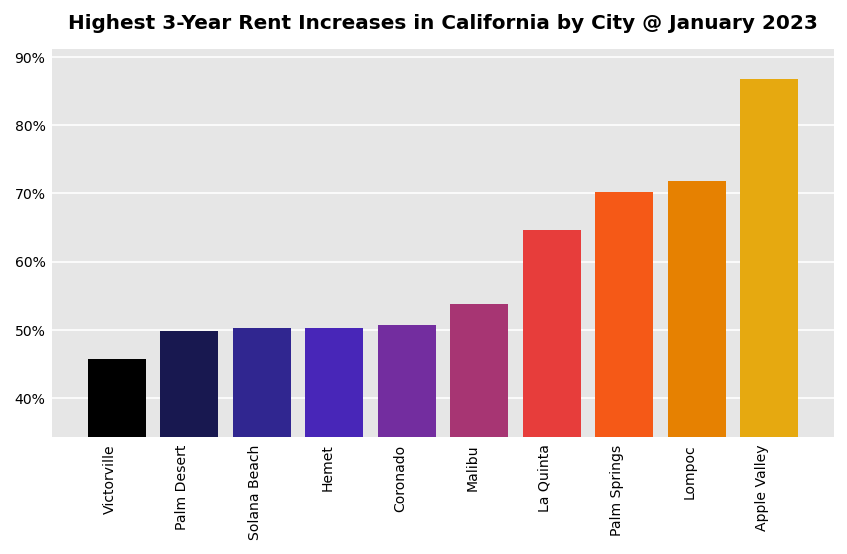

In [257]:
barplot_by_location(top10_rentGrowth['3yr_pct'].copy(), axisformat='pct',title='Highest 3-Year Rent Increases in California by City @ January 2023')

In [245]:
# Calculate the average YoY rent increase in windows of 12 months
CA_rent_increase_12mo_yoy_12m_Avg = zori_timeseries_interpolated.loc[:,(['CA'])].pct_change(12).rolling(12).mean().dropna().mean(axis=1)

<AxesSubplot: >

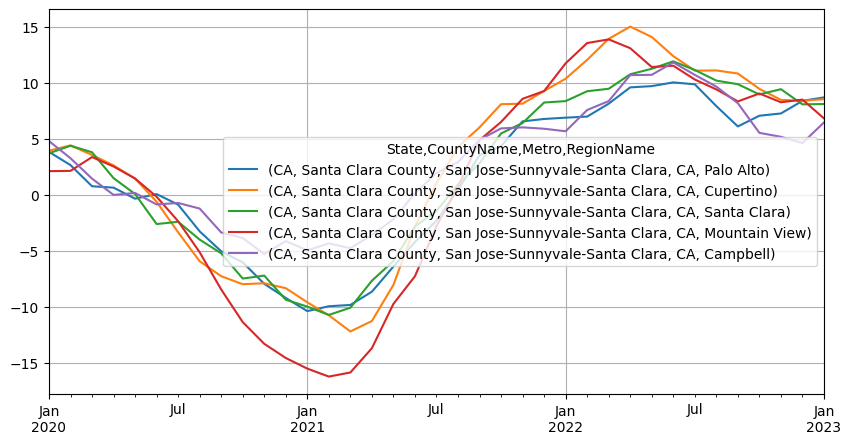

In [29]:
(zori_timeseries_interpolated.loc[:,(['CA'],'Santa Clara County')].pct_change().rolling(12).mean()*1200).dropna().sort_values(by = zori_timeseries_interpolated.index[-1], ascending=False, axis=1).iloc[:,:5].plot(grid=True, figsize=(10,5))

In [295]:
import matplotlib.dates as mdates

def time_series_plot(df, title, ylabel):
    # Plot the line plot
    plt.plot(df)
    # Add a plot for the average of the data
    plt.plot(df.mean(axis=1), color='r', linestyle='dashed', linewidth=1)

    # Format the x axis
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.gcf().autofmt_xdate()

    # Format the y axis
    plt.gca().yaxis.set_tick_params(which='both', direction='out', length=5, pad=10)
    plt.gca().yaxis.set_tick_params(which='major', size=10)
    plt.gca().yaxis.set_tick_params(which='minor', size=5)
    # Use the numerize function to format axis values
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: nz(y)))
    # plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    # Add a title and labels for the x and y axis
    plt.title(title)
    # plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.grid(True)
    # Set figsize to 20,10
    plt.gcf().set_size_inches(10,6)
    # Define the legend to be the column names of the DataFrame at level -1, plus the Average of the data
    plt.legend(df.columns.get_level_values(-1).tolist() + ['Average'])
    # plt.legend(df.columns.get_level_values(-1))
    # Set the legend to be outside the plot area and to the right

    # Show the plot
    plt.show()

In [89]:
# Find the cities with the lowest rent growth in the last 12 months
zori_timeseries_interpolated.iloc[-37:].loc[:,['CA']].pct_change(36).iloc[-1].sort_values(ascending=False).head(8)

State  CountyName             Metro                                 RegionName  
CA     San Bernardino County  Riverside-San Bernardino-Ontario, CA  Apple Valley    0.867816
       Santa Barbara County   Santa Maria-Santa Barbara, CA         Lompoc          0.718182
       Riverside County       Riverside-San Bernardino-Ontario, CA  Palm Springs    0.701374
                                                                    La Quinta       0.646057
       Los Angeles County     Los Angeles-Long Beach-Anaheim, CA    Malibu          0.537454
       San Diego County       San Diego-Chula Vista-Carlsbad, CA    Coronado        0.507818
       Riverside County       Riverside-San Bernardino-Ontario, CA  Hemet           0.503220
       San Diego County       San Diego-Chula Vista-Carlsbad, CA    Solana Beach    0.502948
Name: 2023-01-31 00:00:00, dtype: float64

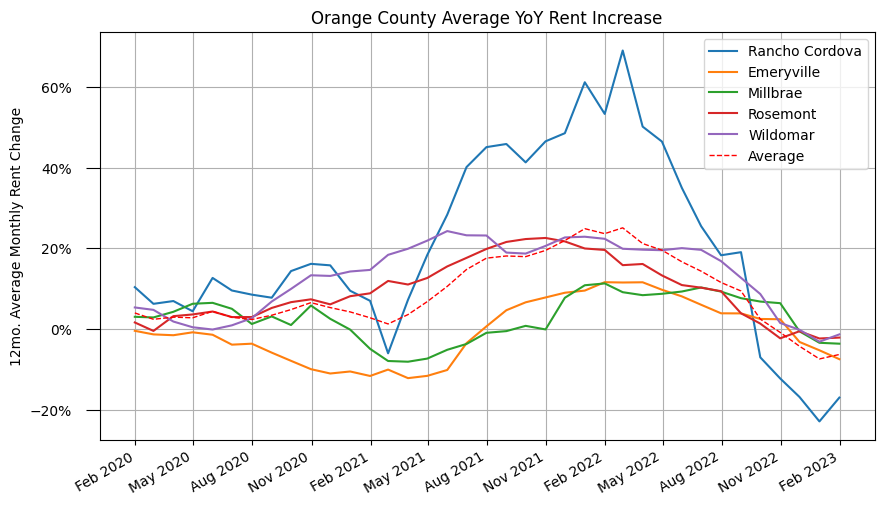

In [286]:
time_series_plot(df = zori_timeseries_interpolated.loc[:,(['CA'])].pct_change().rolling(12).mean().dropna().sort_values(by = zori_timeseries_interpolated.index[-1], ascending=True, axis=1).iloc[:,:5]*1200,
                 title = 'Orange County Average YoY Rent Increase',
                 ylabel = '12mo. Average Monthly Rent Change',)

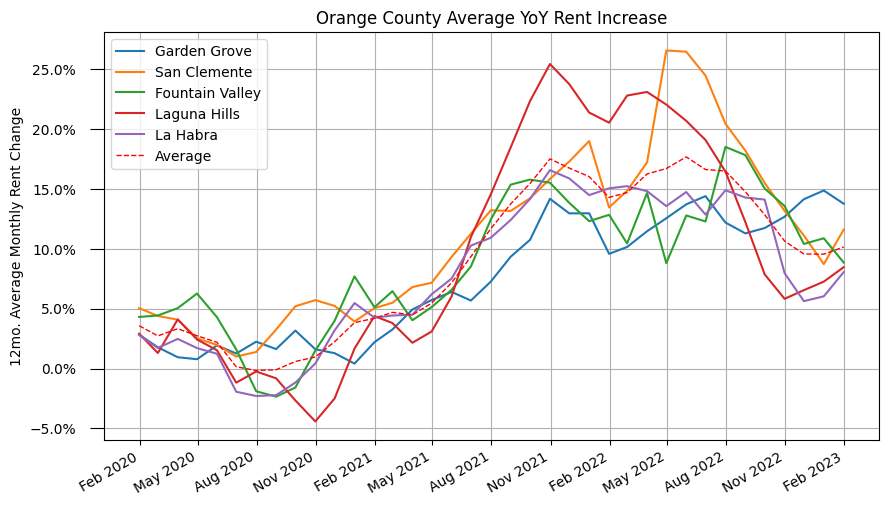

In [287]:
time_series_plot(df = zori_timeseries_interpolated.loc[:,(['CA'],'Orange County')].pct_change().rolling(12).mean().dropna().sort_values(by = zori_timeseries_interpolated.index[-1], ascending=False, axis=1).iloc[:,:5]*1200,
                 title = 'Orange County Average YoY Rent Increase',
                 ylabel = '12mo. Average Monthly Rent Change',)

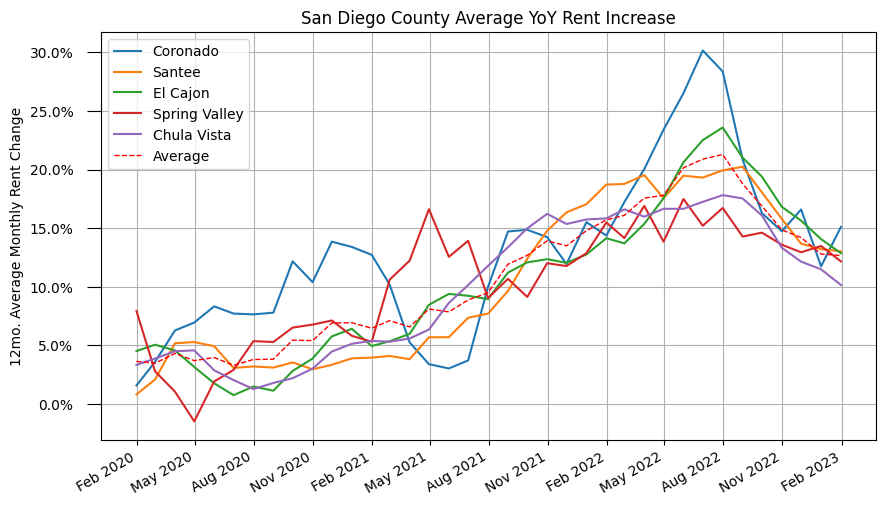

In [288]:
time_series_plot(df = zori_timeseries_interpolated.loc[:,(['CA'],'San Diego County')].pct_change().rolling(12).mean().dropna().sort_values(by = zori_timeseries_interpolated.index[-1], ascending=False, axis=1).iloc[:,:5]*1200,
                 title = 'San Diego County Average YoY Rent Increase',
                 ylabel = '12mo. Average Monthly Rent Change',)

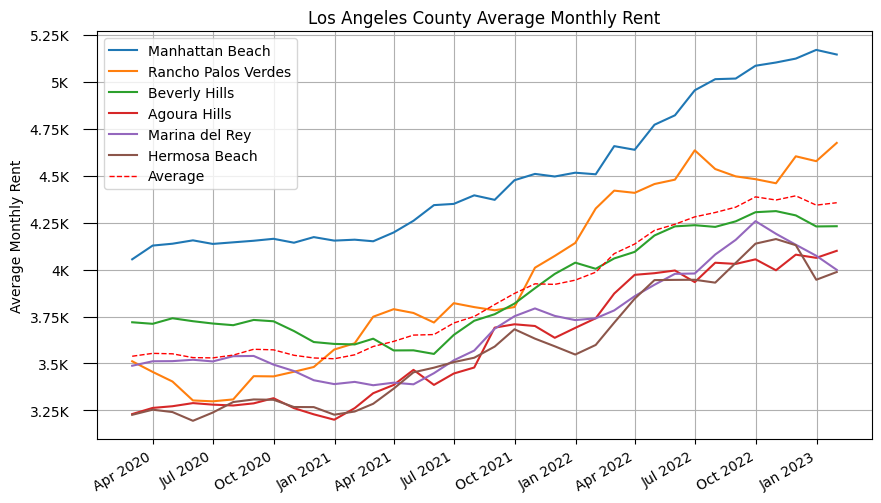

In [296]:
time_series_plot(df = zori_timeseries_interpolated.loc[:,(['CA'],'Los Angeles County')].sort_values(by = zori_timeseries_interpolated.index[-1], ascending=False, axis=1).iloc[-36:,1:7],
                 title = 'Los Angeles County Average Monthly Rent',
                 ylabel = 'Average Monthly Rent',)

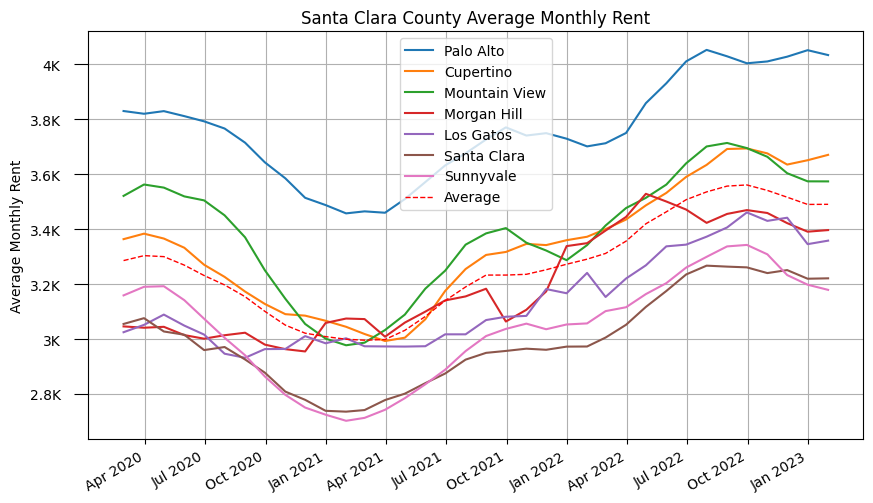

In [297]:
time_series_plot(df = zori_timeseries_interpolated.loc[:,(['CA'],'Santa Clara County')].sort_values(by = zori_timeseries_interpolated.index[-1], ascending=False, axis=1).iloc[-36:,:7],
                    title = 'Santa Clara County Average Monthly Rent',
                    ylabel = 'Average Monthly Rent')

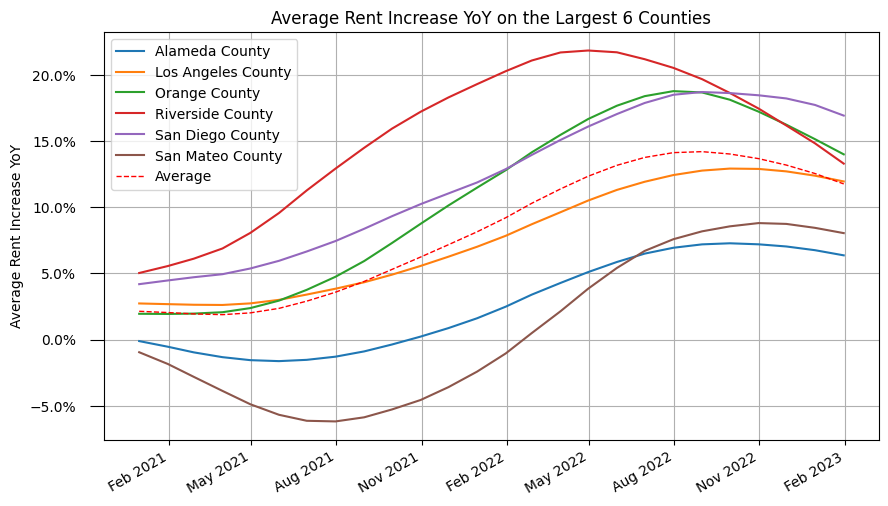

In [291]:
large_6counties = zori_timeseries_interpolated['CA'].iloc[-1].groupby(level=0).count().sort_values(ascending=False).head(6)
# Create a time series plot of the average rent increase year over year on the largest 6 counties
rent_by_county_plot = time_series_plot(df = zori_timeseries_interpolated.loc[:,'CA'].loc[:,large_6counties.index].groupby(level=0, axis=1).mean().pct_change(12).rolling(12).mean()*100,
                    title = 'Average Rent Increase YoY on the Largest 6 Counties',
                    ylabel = 'Average Rent Increase YoY')
# Add the average rent increase year over year on the entire state
rent_by_county_plot

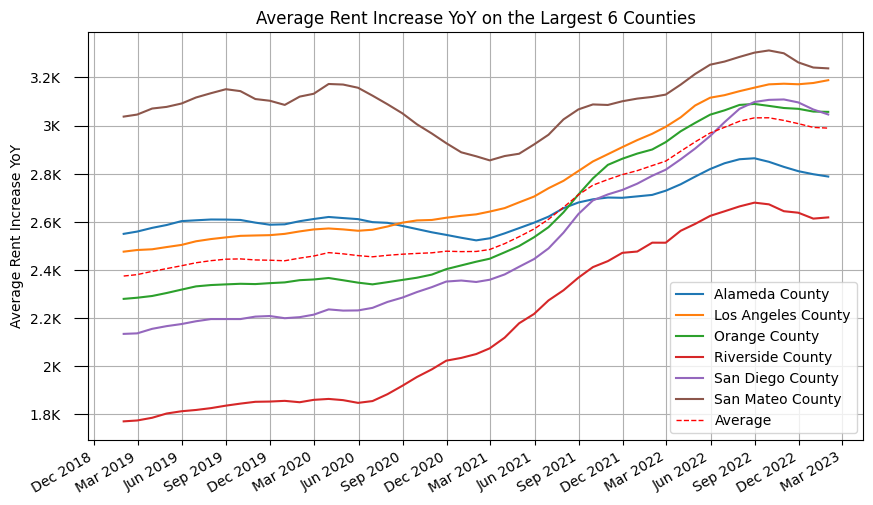

In [298]:
time_series_plot(df = zori_timeseries_interpolated.loc[:,'CA'].loc[:,large_6counties.index].groupby(level=0, axis=1).mean(),
                    title = 'Average Rent Increase YoY on the Largest 6 Counties',
                    ylabel = 'Average Rent Increase YoY')

In [292]:
# Find the difference between the maximum and last value in rent increase year over year on the largest 6 counties
zori_timeseries_interpolated.loc[:,'CA'].loc[:,large_6counties.index].groupby(level=0, axis=1).mean().pct_change(12).rolling(12).mean().iloc[-1] - zori_timeseries_interpolated.loc[:,'CA'].loc[:,large_6counties.index].groupby(level=0, axis=1).mean().pct_change(12).rolling(12).mean().max()

CountyName
Alameda County       -0.009119
Los Angeles County   -0.009732
Orange County        -0.047790
Riverside County     -0.085530
San Diego County     -0.017824
San Mateo County     -0.007592
dtype: float64

In [294]:
# Find the percent change in rent between the maximum and last value in absolute rents
(zori_timeseries_interpolated.loc[:,'CA'].loc[:,large_6counties.index].groupby(level=0, axis=1).mean().iloc[-1] - zori_timeseries_interpolated.loc[:,'CA'].loc[:,large_6counties.index].groupby(level=0, axis=1).mean().max())/zori_timeseries_interpolated.loc[:,'CA'].loc[:,large_6counties.index].groupby(level=0, axis=1).mean().max()

CountyName
Alameda County       -0.026515
Los Angeles County    0.000000
Orange County        -0.010639
Riverside County     -0.022857
San Diego County     -0.020087
San Mateo County     -0.022485
dtype: float64